In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [154]:
import glob
print(glob.glob('**/cleaned_data.csv',recursive=True))

['cleaned_data.csv']


In [155]:
df = pd.read_csv("cleaned_data.csv")
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [156]:
#instantiate labelEncoder
Label_Encoder = LabelEncoder()
#encode target variable
df['churn'] = Label_Encoder.fit_transform(df['churn'])

In [157]:
#split the dataset
X = df.drop(['churn'], axis=1)
y = df['churn']
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [158]:
# split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [159]:
# defining numerical
num_col = X.select_dtypes(exclude='object').columns
num_col


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [160]:
#defining categorical column.
cat_col = X.select_dtypes(include= 'object').columns
cat_col

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

In [161]:
num_pipeline=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore',sparse=False))
        
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,num_col),
        ('categorical_columns',cat_pipeline,cat_col)
    ]
)

In [162]:
# tranform the preprocessing data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_train

array([[ 0.15366751,  1.72547407, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37758941, -0.52080228, -0.58431682, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.40246962, -0.52080228, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.19465546, -0.52080228, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.94983429,  1.72547407, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.7756728 , -0.52080228,  1.680548  , ...,  0.        ,
         0.        ,  1.        ]])

In [163]:
X_test = preprocessor.transform(X_test)
X_test

array([[-0.81666076, -0.52080228, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.02926645,  1.72547407, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [-0.71713991,  1.72547407, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.52687068, -0.52080228, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75079259,  1.72547407, -0.58431682, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12878729, -0.68631738, -0.58431682, ...,  0.        ,
         1.        ,  0.        ]])

In [164]:
#instantiate a logistic regression model with specific solver
model = LogisticRegression(solver='liblinear')
#logistic on training data
model.fit(X_train,y_train)
# predict the target variable for the test data
y_pred=model.predict(X_test)
# calculate the accuracy score by comparing the true labels to the predicted lab
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.8471

In [165]:
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred = y_pred=model.predict_proba(X_test)[:,1]
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
auc=roc_auc_score(y_test,y_pred)
auc

0.7982676374592017

In [166]:
# Predict the probability estimates for the test set using the logistic regression mode
y_pred_train=model.predict(X_train)
# Calculate the ROC AUC score for the predicted probabilities against the true labels
acc_train=accuracy_score(y_train,y_pred_train)
acc_train

0.9058514628657164

# checking overfitting

In [167]:
# Print the testing accuracy score with 4 decimal places for clarity
print(f'testing accuracy score:{acc:.4f}')
# Print the training accuracy score with 4 decimal places to compare with the testing accuracy
print(f'training accuracy score:{acc_train:.4f}')

testing accuracy score:0.8471
training accuracy score:0.9059


 The model seems to generalize well with a slight decrease in performance on the test set, which is quite common.

 In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 90.59% accuracy on the test and the 84.71% on training set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

 I will decrease the C and fit a more flexible mode

In [168]:
# Create a logistic regression model with specified hyperparameters
model=LogisticRegression(C=0.01
                         ,solver='liblinear')
# Fit the logistic regression model using the training data
model.fit(X_train,y_train)
# Make predictions on the test set using the fitted model
y_pred=model.predict(X_test)
# Calculate the accuracy score of the model on the test set
acc=accuracy_score(y_test,y_pred)
acc=round(acc,4)
acc

0.8531

# Compare model accuracy with null accuracy
So, the model accuracy is 0.8531 But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [169]:
# Display the count of each unique value in the 'churn' column of the 'data' DataFrame
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [170]:
# Calculate the null accuracy for a classification model.
null_accuracy=2850/(2850+483)
round(null_accuracy,4)

0.8551

Our model demonstrates an accuracy score of 0.8531, which is almost same as  null accuracy score of 0.8551 This indicates that the Logistic Regression model does not performs well in predicting class labels, showing unreliable accuracy.

However, accuracy alone does not reveal the distribution of predictions or the specific errors the classifier makes. To address this, we can use a Confusion Matrix, which provides deeper insights into the types of errors and the performance across different classes

In [171]:
# Generate a confusion matrix to evaluate the performance of the classification model.
cm = confusion_matrix(y_test, y_pred)
cm

array([[563,   6],
       [ 92,   6]], dtype=int64)

<AxesSubplot:>

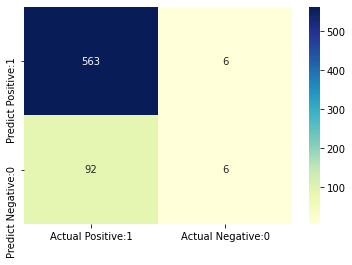

In [172]:
# Convert the confusion matrix into a DataFrame for better visualization and interpretation.
cm= pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
# Use seaborn to create a heatmap for visual representation of the confusion matrix.
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

# Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [173]:
# Print the classification report for the test data and predicted results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       569
           1       0.50      0.06      0.11        98

    accuracy                           0.85       667
   macro avg       0.68      0.53      0.51       667
weighted avg       0.81      0.85      0.80       667



# Observations:
.Class Imbalance: The dataset is imbalanced, with 569 instances of False and only 98 instances of True. This imbalance affects the model's ability to accurately predict the minority class (churners), leading to biased performance favoring the majority class
. Good Performance for False: The classifier performs well for the majority class (False), as indicated by high precision, recall, and F1-score.
. Poor Performance for True: The model struggles with the minority class (True), evident from low recall (6%) and F1-score (11%).
Accuracy is Misleading: Despite 85% accuracy, the model is heavily biased towards predicting the majority class.

# Decision Tree
First we are going to get the default model performance and then we are going to tune it using the following parameters:

1.max_depth


2.min_samples_leaf 

In [174]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test,y_pred)
print(f'accuracy score decision tree :{round(auc,4)}')



accuracy score decision tree :0.8533


# Tune of max_depth

In [175]:
depths =[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]
for d in depths:
    dt=DecisionTreeClassifier(max_depth=d,random_state=1)
    dt.fit(X_train,y_train)
    y_pred=dt.predict_proba(X_test)[:,0]
    score=roc_auc_score(y_test,y_pred)
    print(d,score)

2 0.23309780854345252
3 0.18235536745453895
4 0.17020551630142386
5 0.1352982317707399
6 0.1401761055916215
7 0.14157490764319788
8 0.1503712205444568
9 0.20736343746637498
10 0.18183530002510673
15 0.1602883684229403
20 0.1582439654244826
50 0.16505864208600843


From this we can see that max_depths of 2,3 and 9 give the better results. From that point we can tune the next parameter min_samples_leaf

In [179]:
# Define a list of possible depths for the Decision Tree
depths = [2, 3, 9]

# Define a list of possible minimum samples per leaf for the Decision Tree
sample_leafs = [1, 2, 5, 10, 15, 20, 100, 200, 500]

# Initialize an empty list to store the scores for different configurations
scores = []

# Loop through each combination of tree depth and minimum samples per leaf
for d in depths:
    for s in sample_leafs:
        # Create a Decision Tree classifier with the current depth and minimum samples per leaf
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        
        # Fit the model on the training data
        dt.fit(X_train, y_train)
        
        # Predict the probability of the positive class for the test data
        y_pred = dt.predict_proba(X_test)[:, 1]
        
        # Calculate the ROC AUC score for the current model
        score = roc_auc_score(y_test, y_pred)
        
        # Append the configuration (depth, min_samples_leaf, and score) to the scores list
        scores.append((d, s, score))

<AxesSubplot:xlabel='depth', ylabel='leafs'>

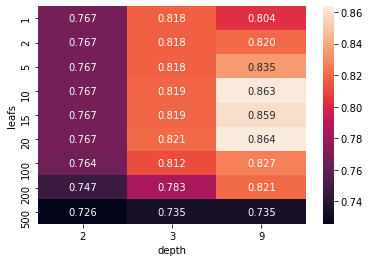

In [180]:
# Create a DataFrame from the list of scores, with columns for depth, number of leaf nodes, and ROC AUC score
df_scores = pd.DataFrame(scores, columns=['depth', 'leafs', 'score'])
sns.heatmap(df_scores.pivot(index='leafs', columns='depth', values='score'), annot=True, fmt='.3f')

The best performance is achieved with a tree depth of 9 and 10,15 or 20 leaf nodes.

# Random Forest
As we did with the Decision Tree model, we are going to try the Random Forest model with default parameters and tune it using:

n_estimators
max_depth
min_sample_leaf

In [181]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
y_pred=rf.predict_proba(X_test)[:,1]
score=roc_auc_score(y_test,y_pred)
print(f'Auc ')

Auc 


Now we can try with different n_estimators values to see the best choice

In [185]:
scores=[]
for e in range(10,201,10):
    rf=RandomForestClassifier(n_estimators=e,n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred=rf.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test,y_pred)
    scores.append((e,round(auc,2)))
    

In [186]:
df_scores=pd.DataFrame(scores,columns=['n_estimatores','auc'])
df_scores

,n_estimatores,auc
0,10,0.86
1,20,0.88
2,30,0.89
3,40,0.89
4,50,0.90
5,60,0.90
6,70,0.90
7,80,0.90
8,90,0.89
9,100,0.89


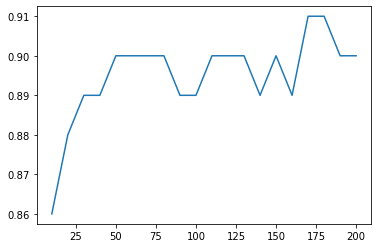

In [187]:
plt.plot(df_scores.n_estimatores,df_scores.auc)

Looking at the results table and the chart we see that a n_estimator=17 or 16 would be ideal, since after that there is no real considerable impact over the auc score.

Now we can try with different n_estimators values to see the best choice

In [188]:
scores = []

for d in [5, 6, 7, 10, 15]:
        for e in range(10, 201, 10):
            rf = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=d)
            rf.fit(X_train, y_train)
        
            y_pred = rf.predict_proba(X_test)[:,1]
            auc = roc_auc_score(y_test, y_pred)
            scores.append((d,e,auc))

df_scores = pd.DataFrame(scores, columns=['depth','n_estimators','auc'])
df_scores

,depth,n_estimators,auc
0,5,10,0.851037
1,5,20,0.851037
2,5,30,0.851037
3,5,40,0.851037
4,5,50,0.851037
...,...,...,...
95,15,160,0.880331
96,15,170,0.880331
97,15,180,0.880331
98,15,190,0.880331


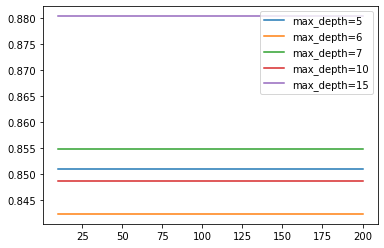

In [189]:
for d in [5, 6, 7, 10, 15]:
    df_subset = df_scores[df_scores.depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth=%d" % d)
plt.legend()

Based on this result we clearly see that a max_depth=15 is the best option.

Final step: tune the min_sample_leaf parameter

In [190]:
scores = []

for s in [1, 5, 10, 20, 50]:
        for e in range(10, 201, 10):
           rf = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=10, min_samples_leaf=s)
           rf.fit(X_train, y_train)
        
           y_pred = rf.predict_proba(X_test)[:,1]
           auc = roc_auc_score(y_test, y_pred)
           scores.append((s, e,auc))

df_scores = pd.DataFrame(scores, columns=['sample_leaf','n_estimators','auc'])
df_scores

,sample_leaf,n_estimators,auc
0,1,10,0.848687
1,1,20,0.848687
2,1,30,0.848687
3,1,40,0.848687
4,1,50,0.848687
...,...,...,...
95,50,160,0.828037
96,50,170,0.828037
97,50,180,0.828037
98,50,190,0.828037


The best minimum leaf is 1

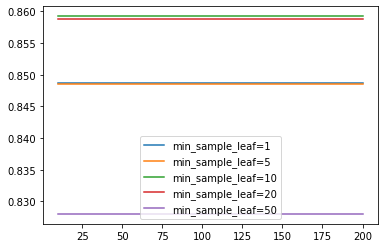

In [191]:
for s in [1, 5, 10, 20, 50]:
    df_subset = df_scores[df_scores.sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="min_sample_leaf=%d" % s)
plt.legend()

# Based on these results, the best parameters would be:


n_estimators=17

max_depth=15

min_sample_leaf=1

With these parameters lets get the final auc score

In [192]:
rf = RandomForestClassifier(n_estimators=17, random_state=1, max_depth=15, min_samples_leaf=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_pred)
print(f'roc score:{round(auc,4)}')

roc score:0.8632
